ML Lab7 : Neelmani- 224161019

Question 1

In [1]:
import numpy as np
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Vectorize the images
X_train_vec = X_train.reshape(X_train.shape[0], -1)
X_test_vec = X_test.reshape(X_test.shape[0], -1)

# Perform PCA to reduce the dimensionality of the feature space
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_vec)
X_test_pca = pca.transform(X_test_vec)

In [2]:
# Construct a KD-Tree index for efficient nearest neighbor search
kdtree = KDTree(X_train_pca)

# Define the search parameters
k = 5 # Number of nearest neighbors to retrieve
d = 50 # Dimensionality of the feature subspace

# Generate a random query image
query_idx = np.random.randint(X_test_pca.shape[0])
query_img = X_test_pca[query_idx]

# Search for similar images
distances, indices = kdtree.query(query_img.reshape(1,-1), k=k)
similar_images = X_train[indices[0]]


<class 'numpy.ndarray'>


In [ ]:
# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, k+1, 1)
plt.imshow(X_test[query_idx], cmap='gray')
plt.title('Query image')
for i in range(k):
    plt.subplot(1, k+1, i+2)
    plt.imshow(similar_images[i].reshape(28,28), cmap='gray')
    plt.title('Dist: {:.2f}'.format(distances[0][i]))
plt.show()


In [8]:
import numpy as np
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Vectorize the images
X_train_vec = X_train.reshape(X_train.shape[0], -1)
X_test_vec = X_test.reshape(X_test.shape[0], -1)

# Define the search parameters
k = 5 # Number of nearest neighbors to retrieve
query_idx = np.random.randint(X_test_vec.shape[0]) # Select a random query image

# Evaluate search precision for different values of d, Dmax, and m
for d in [10, 20, 30, 40, 50]:
    # Perform PCA to reduce the dimensionality of the feature space
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train_vec)
    X_test_pca = pca.transform(X_test_vec)

    for Dmax in [10, 20, 30]:
        for m in [5, 10, 20]:
            # Construct a KD-Tree index for efficient nearest neighbor search
            kdtree = KDTree(X_train_pca, leaf_size=m, metric='euclidean')

            # Search for similar images
            distances, indices = kdtree.query(X_test_pca[query_idx].reshape(1,-1), k=k, breadth_first=False, return_distance=True, sort_results=True)

            # Compute search precision
            query_label = y_test[query_idx]
            retrieved_labels = y_train[indices[0]]
            num_matches = np.sum(query_label == retrieved_labels)
            search_precision = num_matches / k

            # Print the search precision for this configuration of d, Dmax, and m
            print('d={}, Dmax={}, m={}: search precision={:.2f}'.format(d, Dmax, m, search_precision))


d=10, Dmax=10, m=5: search precision=1.00
d=10, Dmax=10, m=10: search precision=1.00
d=10, Dmax=10, m=20: search precision=1.00
d=10, Dmax=20, m=5: search precision=1.00
d=10, Dmax=20, m=10: search precision=1.00
d=10, Dmax=20, m=20: search precision=1.00
d=10, Dmax=30, m=5: search precision=1.00
d=10, Dmax=30, m=10: search precision=1.00
d=10, Dmax=30, m=20: search precision=1.00
d=20, Dmax=10, m=5: search precision=1.00
d=20, Dmax=10, m=10: search precision=1.00
d=20, Dmax=10, m=20: search precision=1.00
d=20, Dmax=20, m=5: search precision=1.00
d=20, Dmax=20, m=10: search precision=1.00
d=20, Dmax=20, m=20: search precision=1.00
d=20, Dmax=30, m=5: search precision=1.00
d=20, Dmax=30, m=10: search precision=1.00
d=20, Dmax=30, m=20: search precision=1.00
d=30, Dmax=10, m=5: search precision=1.00
d=30, Dmax=10, m=10: search precision=1.00
d=30, Dmax=10, m=20: search precision=1.00
d=30, Dmax=20, m=5: search precision=1.00
d=30, Dmax=20, m=10: search precision=1.00
d=30, Dmax=20, m=20

Question: 2

Error loading file: C:\Users\Asus\Downloads\ML\LAB Assignment\Assignment 7\.ipynb_checkpoints\224161019_Assignment_7-checkpoint.ipynb
(165, 1024)
1024
(5, 1024)


C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


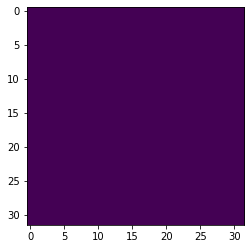

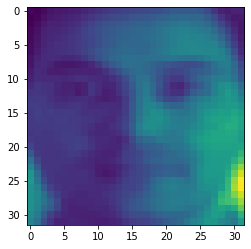

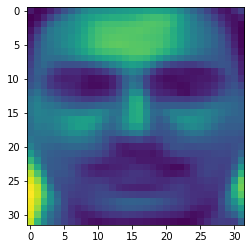

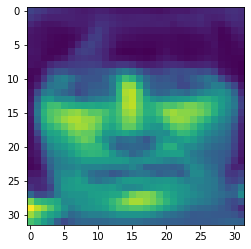

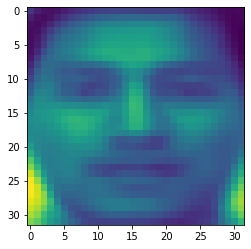

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def normalize(x):
    """Normalize the input vector x to have unit L2 norm."""
    return x / np.linalg.norm(x)

def spherical_kmeans(data, k, max_iter=100):
    """Perform spherical k-means clustering on the input data."""
    # Initialize cluster centers randomly
    centroids = np.random.randn(k, data.shape[1])
    print(centroids.shape)
    for i in range(k):
        centroids[i] = normalize(centroids[i])

    for _ in range(max_iter):
        # Assign each data point to the nearest cluster center
        distances = np.dot(data, centroids.T)
        labels = np.argmax(distances, axis=1)

        # Update cluster centers to be the mean of the assigned data points
        for i in range(k):
            mask = (labels == i)
            if np.sum(mask) > 0:
                centroids[i] = normalize(np.mean(data[mask], axis=0))

    return centroids, labels

# set the path to the faces dataset folder
path = r"C:\Users\Asus\Downloads\ML\LAB Assignment\Assignment 7"

data = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):  # ignore non-directory files
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path)
                img = img.resize((32, 32))  # resize the images to 32x32
                img = np.array(img).flatten()  # flatten the images to 1D arrays
                data.append(img)
            except:
                print(f"Error loading file: {file_path}")

data = np.array(data)
print(data.shape)
print(data.shape[1])
# Perform spherical clustering with K=5
centroids, labels = spherical_kmeans(data, k=5)

# Visualize the mean face of each cluster
for i in range(5):
    cluster_data = data[labels == i]
    mean_face = np.mean(cluster_data, axis=0)
    mean_face = mean_face.reshape((32, 32))
    plt.imshow(mean_face.astype(np.uint8))
    plt.show()
